# visualize or_matseg dataset

In [2]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

print(sys.path)

# from mask2former.data.datasets.register_or_matseg_panoptic import register_all_or_matseg_panoptic
# _root = os.getenv("DETECTRON2_DATASETS", "../datasets")
# register_all_or_matseg_panoptic(_root)

from detectron2.data import MetadataCatalog, DatasetCatalog
from panopticapi import utils as panopticapi_utils
or_matseg_panoptic_metadata = MetadataCatalog.get("coco_2017_val_panoptic")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['/home/ruizhu/Documents/Projects/Mask2Former/notebooks', '/home/ruizhu/miniconda3/envs/py310matsegnerf/lib/python310.zip', '/home/ruizhu/miniconda3/envs/py310matsegnerf/lib/python3.10', '/home/ruizhu/miniconda3/envs/py310matsegnerf/lib/python3.10/lib-dynload', '', '/home/ruizhu/miniconda3/envs/py310matsegnerf/lib/python3.10/site-packages', '/home/ruizhu/miniconda3/envs/py310matsegnerf/lib/python3.10/site-packages/MultiScaleDeformableAttention-1.0-py3.10-linux-x86_64.egg', '/home/ruizhu/Documents/Projects/Mask2Former']


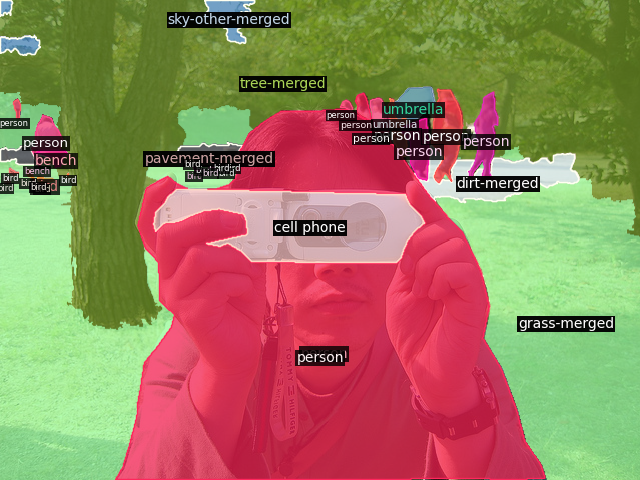

: 

In [4]:

from mask2former.data.datasets.register_coco_panoptic_annos_semseg import load_coco_panoptic_json, get_metadata
metadata = get_metadata()
panoptic_json = '../datasets/coco/annotations/panoptic_val2017.json'
assert Path(panoptic_json).exists(), panoptic_json
image_root = '../datasets/coco/val2017'
panoptic_root = '../datasets/coco/panoptic_val2017'
sem_seg_root = '../datasets/coco/panoptic_semseg_val2017'

dataset_dicts = load_coco_panoptic_json(
    panoptic_json, image_root, panoptic_root, sem_seg_root, metadata
)

import random
import cv2
from detectron2.utils.visualizer import Visualizer
from google.colab.patches import cv2_imshow

for d in random.sample(dataset_dicts, 1):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=or_matseg_panoptic_metadata, scale=1)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])
    
    pan_seg_file_name = d['pan_seg_file_name']
    assert Path(pan_seg_file_name).exists()


In [24]:
d

{'file_name': '/data/OpenRooms_public/main_xml1/scene0418_02/im_sdr/im_18.png',
 'image_id': 1591,
 'pan_seg_file_name': '/data/OpenRooms_public/im_pan_seg_rgb/main_xml1/scene0418_02/im_pan_seg_rgb_18.png',
 'segments_info': [{'id': 1,
   'category_id': 0,
   'iscrowd': 0,
   'isthing': False,
   'isstuff': 1,
   'area': 28623.0},
  {'id': 2,
   'category_id': 0,
   'iscrowd': 0,
   'isthing': False,
   'isstuff': 1,
   'area': 28065.0},
  {'id': 3,
   'category_id': 0,
   'iscrowd': 0,
   'isthing': False,
   'isstuff': 1,
   'area': 81047.0},
  {'id': 4,
   'category_id': 0,
   'iscrowd': 0,
   'isthing': False,
   'isstuff': 1,
   'area': 15549.0},
  {'id': 5,
   'category_id': 0,
   'iscrowd': 0,
   'isthing': False,
   'isstuff': 1,
   'area': 8287.0},
  {'id': 6,
   'category_id': 0,
   'iscrowd': 0,
   'isthing': False,
   'isstuff': 1,
   'area': 52304.0},
  {'id': 7,
   'category_id': 0,
   'iscrowd': 0,
   'isthing': False,
   'isstuff': 1,
   'area': 87112.0}]}